# Data Understanding & Exploration
**Analyst:** Hamza

---

## Content
1. Load Data & Initial Overview
2. Data Structure & Relationships
3. Data Quality Assessment
4. Distributions & Statistics
5. Key Findings & Conclusions

## 1. Load Data and Initial Overview

In [1]:
import sys
sys.path.append("../src")

from data.loader import load_excel_sheets, summarize_excel_sheets
from data.preview import preview_all_datasets, check_duplicates
from data.relationships import explore_structure, infer_relationships
from data.quality import print_missing_data, plot_missing_heatmaps, plot_missing_summary_bar
from data.statistics import analyze_numerical_statistics, analyze_categorical_distributions

file_path = "../data/processed/Project Data.xlsx"

datasets = load_excel_sheets(file_path)
summary_df = summarize_excel_sheets(datasets)

summary_df

,Sheet,Rows,Columns,Missing Values,Duplicates
0,Product Lookup,293,12,134,0
1,Customer Lookup,18148,15,260,0
2,Product Subcateg,37,3,0,0
3,Product Categori,4,2,0,0
4,Territory Lookup,10,4,0,0
5,Returns Data,1809,4,0,0
6,Sales Data,56046,8,0,0
7,Calendar Lookup,912,9,0,0


### Preview Each Dataset

In [2]:
preview_all_datasets(datasets, n_rows=3)


 Product Lookup


,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SKU Type,Discount Price
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,NaN,13.0863,34.9900,HL-U509,31.49100
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,NaN,12.0278,33.6442,HL-U509,30.27978
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,U,3.3963,9.5000,SO-B909,8.55000



Customer Lookup


,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Full Name,Domain Name
0,11000,Mr.,Jon,Yang,24205,M,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y,Mr. Jon Yang,Adventure Works
1,11001,Mr.,Eugene,Huang,23876,S,M,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N,Mr. Eugene Huang,Adventure Works
2,11002,Mr.,Ruben,Torres,23966,M,M,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y,Mr. Ruben Torres,Adventure Works



Product Subcateg


,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1



Product Categori


,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components
2,3,Clothing



Territory Lookup


,SalesTerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America



Returns Data


,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,43848,9,312,1
1,43848,10,310,1
2,43851,8,346,1



Sales Data


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,43831,43729,SO45080,332,14657,1,1,1
1,43831,43804,SO45079,312,29255,4,1,1
2,43831,43767,SO45082,350,11455,9,1,1



Calendar Lookup


,Date,Day Name,Start of Week,Start of Month,Start of Quarter,Month Name,Month,Start of Year,Year
0,43831,Wednesday,43829,43831,43831,January,1,43831,2020
1,43832,Thursday,43829,43831,43831,January,1,43831,2020
2,43833,Friday,43829,43831,43831,January,1,43831,2020


## 2. Data Structure & Relationships

### 2.1 Detailed Structure Analysis

Exploring data types, columns, and unique value counts for each dataset.

In [3]:
explore_structure(datasets)

 Product Lookup
------------------------------------------------------------
Shape: (293, 12)

Data Types:
ProductKey                 int64
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductColor              object
ProductStyle              object
ProductCost              float64
ProductPrice             float64
SKU Type                  object
Discount Price           float64
dtype: object

Columns:
['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName', 'ModelName', 'ProductDescription', 'ProductColor', 'ProductStyle', 'ProductCost', 'ProductPrice', 'SKU Type', 'Discount Price']

Unique value count per column:
ProductKey: 293 unique values
ProductSubcategoryKey: 37 unique values
ProductSKU: 293 unique values
ProductName: 293 unique values
ModelName: 119 unique values
ProductDescription: 115 unique values
ProductColor: 9 unique values
ProductStyle: 3 

### 2.2 Database Relationship Diagram

Visualizing the relationships between different datasets.

In [4]:
from data.db_model import generate_dbml, parent_mapping

generate_dbml(datasets, parent_mapping)

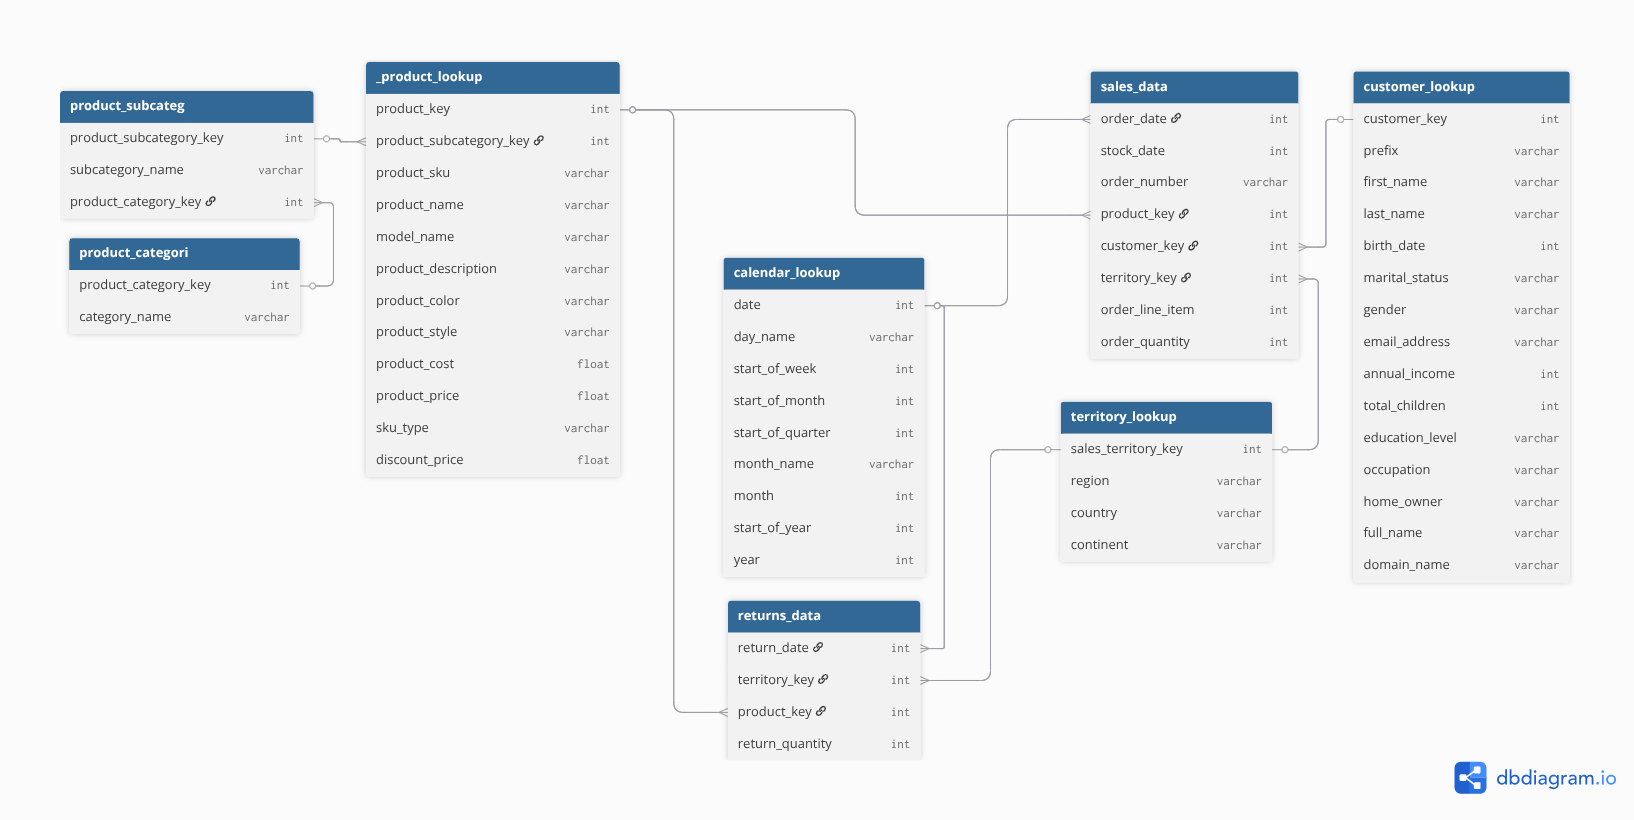

In [10]:
from IPython.display import Image, display

display(Image("../results/db/dataset RD.png"))

### Key Relationship Observations

Based on the analysis above:
- **Primary Keys:** Each dataset has unique identifier columns (e.g., CustomerID, OrderID, ProductID)
- **Foreign Keys:** Orders link to Customers, Products, and Territories via the tables ID columns


## 3. Data Quality Assessment

### 3.1 Missing Values Analysis

In [11]:
print_missing_data(datasets)

 Product Lookup:
ProductColor    50
ProductStyle    84
dtype: int64

Total: 134 (3.81%)


Customer Lookup:
Prefix    130
Gender    130
dtype: int64

Total: 260 (0.10%)


Product Subcateg:
No missing values found.


Product Categori:
No missing values found.


Territory Lookup:
No missing values found.


Returns Data:
No missing values found.


Sales Data:
No missing values found.


Calendar Lookup:
No missing values found.




### 3.2 Missing Data Visualization

red = missing and green = present

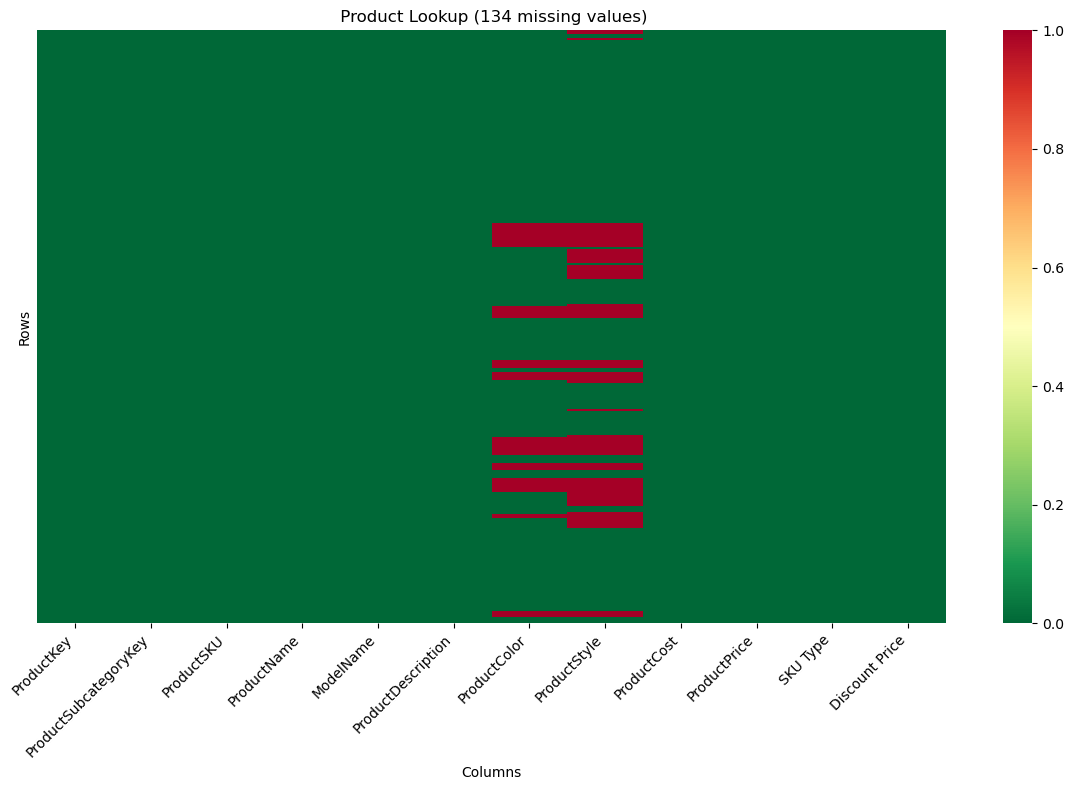

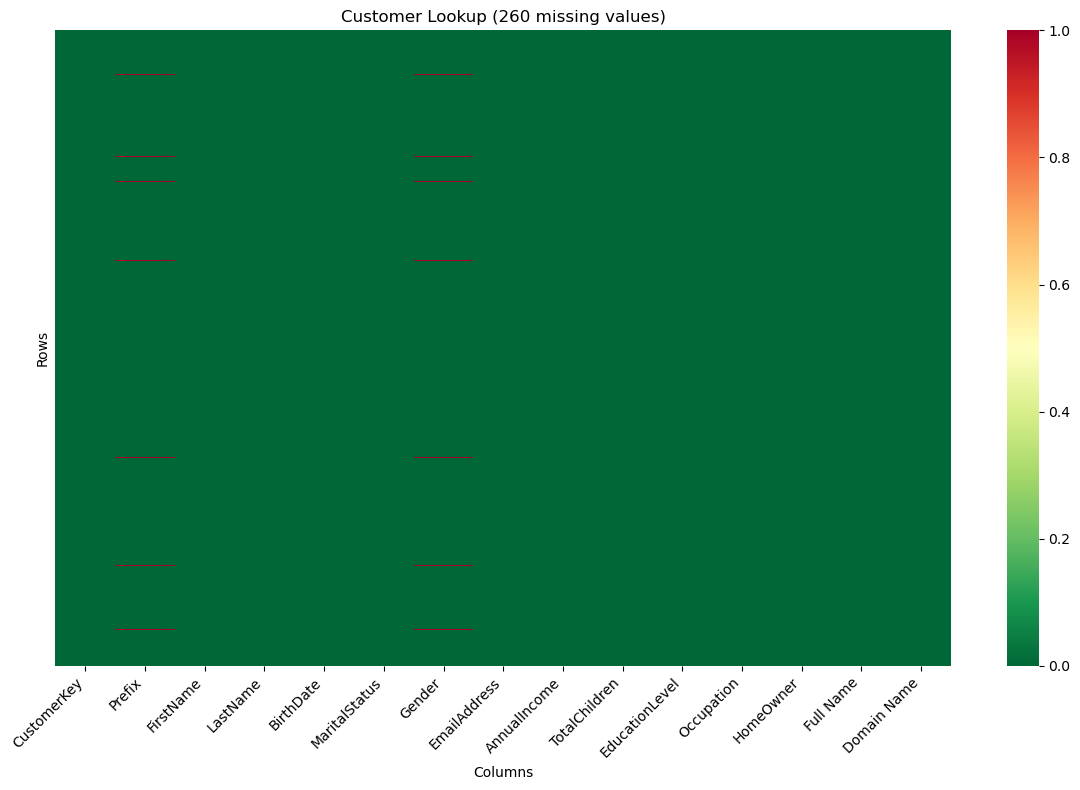

In [12]:
plot_missing_heatmaps(datasets)

### 3.2.1 Missing Data Summary Chart

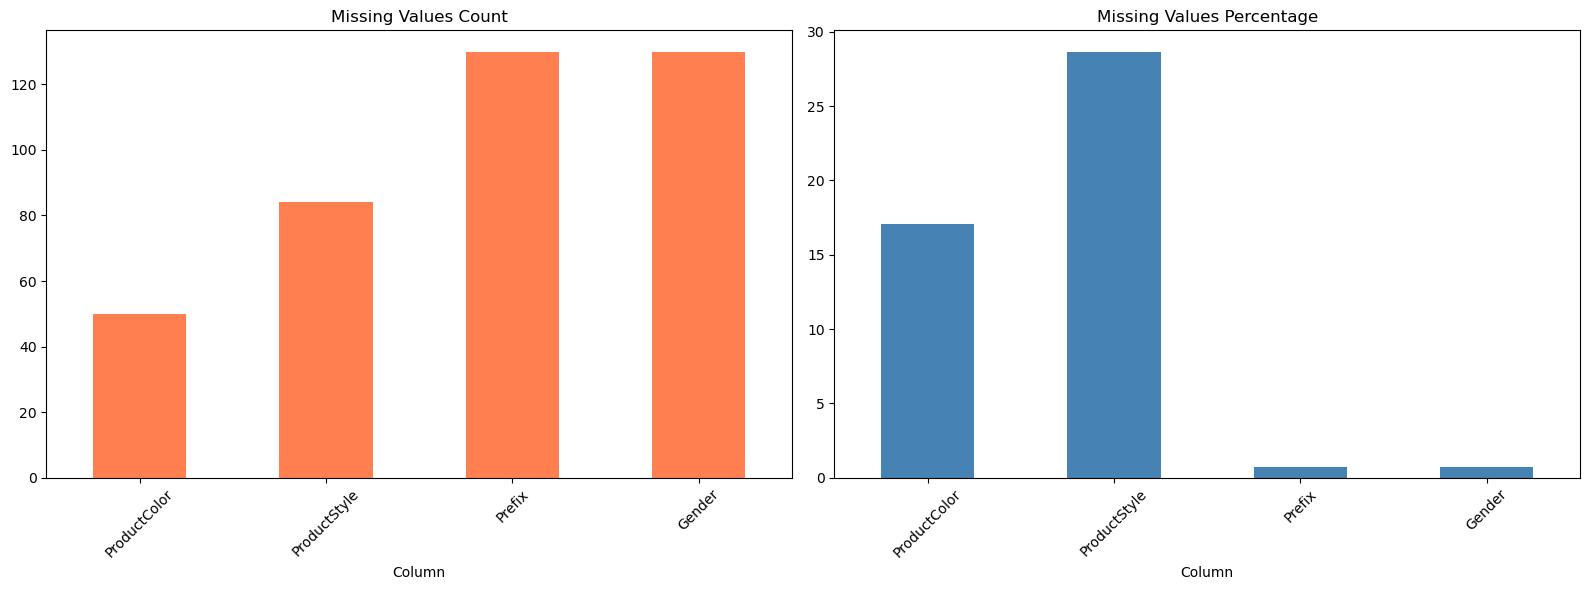

,Dataset,Column,Missing Count,Missing %
0,Product Lookup,ProductColor,50,17.06
1,Product Lookup,ProductStyle,84,28.67
2,Customer Lookup,Prefix,130,0.72
3,Customer Lookup,Gender,130,0.72


In [15]:
import importlib
import data.quality
importlib.reload(data.quality)

from data.quality import plot_missing_summary_bar

missing_summary = plot_missing_summary_bar(datasets)
if missing_summary is not None:
    display(missing_summary)

### 3.3 Duplicate Records Check

In [16]:
check_duplicates(datasets)

 Product Lookup: 0 duplicate rows

Customer Lookup: 0 duplicate rows

Product Subcateg: 0 duplicate rows

Product Categori: 0 duplicate rows

Territory Lookup: 0 duplicate rows

Returns Data: 0 duplicate rows

Sales Data: 0 duplicate rows

Calendar Lookup: 0 duplicate rows



### Data Quality Summary

Based on the analysis above:

- **Missing Values:** 
  - Product Lookup dataset has missing values in `ProductColor` and `ProductStyle` columns
  - These missing values may need imputation or special handling depending on analysis requirements
  
- **Duplicates:** All datasets appear clean with no duplicate records

- **Data Cleanliness:** Overall high quality with minimal issues

- **Issues Found:** 
  - Missing product attributes Color and Style, which may affect product based analysis
  - Consider if these missing values are systematic like certain product categories don't have colors

## 4. Distributions & Statistics

### 4.1 Numerical Statistics

In [17]:
analyze_numerical_statistics(datasets)


 Product Lookup


,ProductKey,ProductSubcategoryKey,ProductCost,ProductPrice,Discount Price
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,441.552901,12.283276,413.661009,714.437357,642.993621
std,108.064327,9.892831,517.611849,872.157258,784.941532
min,214.000000,1.000000,0.856500,2.290000,2.061000
25%,354.000000,2.000000,31.724400,63.500000,57.150000
50%,457.000000,12.000000,199.375700,333.420000,300.078000
75%,533.000000,17.000000,601.743700,1003.910000,903.519000
max,606.000000,37.000000,2171.294200,3578.270000,3220.443000




Customer Lookup


,CustomerKey,BirthDate,AnnualIncome,TotalChildren
count,18148.000000,18148.000000,18148.000000,18148.000000
mean,20247.470465,22675.320201,57269.120564,1.843619
std,5336.245656,4110.881611,32236.535573,1.613203
min,11000.000000,3878.000000,10000.000000,0.000000
25%,15626.750000,19978.750000,30000.000000,0.000000
50%,20252.500000,23243.000000,60000.000000,2.000000
75%,24868.250000,25837.000000,70000.000000,3.000000
max,29483.000000,29581.000000,170000.000000,5.000000




Product Subcateg


,ProductSubcategoryKey,ProductCategoryKey
count,37.000000,37.000000
mean,19.000000,2.783784
std,10.824355,1.003747
min,1.000000,1.000000
25%,10.000000,2.000000
50%,19.000000,3.000000
75%,28.000000,4.000000
max,37.000000,4.000000




Product Categori


,ProductCategoryKey
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000




Territory Lookup


,SalesTerritoryKey
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000




Returns Data


,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
count,1809.000000,1809.000000,1809.000000,1809.000000
mean,44547.534549,6.259812,443.460475,1.010503
std,159.415814,2.948103,115.326651,0.101973
min,43848.000000,1.000000,214.000000,1.000000
25%,44478.000000,4.000000,369.000000,1.000000
50%,44572.000000,7.000000,479.000000,1.000000
75%,44661.000000,9.000000,529.000000,1.000000
max,44742.000000,10.000000,606.000000,2.000000




Sales Data


,OrderDate,StockDate,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
count,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000
mean,44546.827124,44479.480159,438.962103,18843.645559,6.254666,1.903151,1.501873
std,159.834274,162.754259,118.612352,5412.449843,2.958005,1.021006,0.612379
min,43831.000000,43719.000000,214.000000,11000.000000,1.000000,1.000000,1.000000
25%,44475.000000,44407.000000,360.000000,14016.000000,4.000000,1.000000,1.000000
50%,44572.000000,44505.000000,479.000000,18157.000000,7.000000,2.000000,1.000000
75%,44663.000000,44595.000000,529.000000,23425.750000,9.000000,2.000000,2.000000
max,44742.000000,44727.000000,606.000000,29483.000000,10.000000,8.000000,3.000000




Calendar Lookup


,Date,Start of Week,Start of Month,Start of Quarter,Month,Start of Year,Year
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,44286.500000,44283.501096,44271.788377,44241.396930,5.922149,44122.558114,2020.797149
std,263.416021,263.429293,263.289384,262.147226,3.401987,273.385264,0.747827
min,43831.000000,43829.000000,43831.000000,43831.000000,1.000000,43831.000000,2020.000000
25%,44058.750000,44053.000000,44044.000000,44013.000000,3.000000,43831.000000,2020.000000
50%,44286.500000,44284.000000,44271.500000,44242.000000,6.000000,44197.000000,2021.000000
75%,44514.250000,44509.750000,44501.000000,44470.000000,9.000000,44197.000000,2021.000000
max,44742.000000,44739.000000,44713.000000,44652.000000,12.000000,44562.000000,2022.000000


### 4.2 Categorical Distributions

Analyzing categorical columns for unique values and distributions.

In [18]:
analyze_categorical_distributions(datasets)


 Product Lookup

ProductSKU:
ProductSKU
HL-U509-R     1
FR-T98U-50    1
RB-9231       1
FR-M63S-46    1
FR-M63S-42    1
             ..
FK-9939       1
FK-5136       1
FK-1639       1
BK-R64Y-48    1
BK-R19B-52    1
Name: count, Length: 293, dtype: int64
Unique values: 293
----------------------------------------

ProductName:
ProductName
Sport-100 Helmet, Red               1
HL Touring Frame - Blue, 50         1
Rear Brakes                         1
ML Mountain Frame-W - Silver, 46    1
ML Mountain Frame-W - Silver, 42    1
                                   ..
HL Fork                             1
ML Fork                             1
LL Fork                             1
Road-550-W Yellow, 48               1
Road-750 Black, 52                  1
Name: count, Length: 293, dtype: int64
Unique values: 293
----------------------------------------

ModelName:
ModelName
LL Road Frame         12
Road-650              12
Mountain-500          10
LL Touring Frame      10
LL Mountain Frame  

Unique values: 25164
----------------------------------------


Calendar Lookup

Day Name:
Day Name
Wednesday    131
Thursday     131
Friday       130
Saturday     130
Sunday       130
Monday       130
Tuesday      130
Name: count, dtype: int64
Unique values: 7
----------------------------------------

Month Name:
Month Name
January      93
March        93
May          93
April        90
June         90
February     85
July         62
August       62
October      62
December     62
September    60
November     60
Name: count, dtype: int64
Unique values: 12
----------------------------------------



---

### Statistical Insights

Key observations from the statistical analysis:

**Numerical Ranges:**
- Product costs range from approximately $12 to higher values with 111 unique cost points
- Product prices show 107 unique price points, indicating diverse product pricing strategy
- Annual income in Customer dataset has 16 distinct levels, providing good segmentation for customer analysis
- Order quantities are limited to 3 unique values, suggesting standardized order sizes
- Return quantities show only 2 unique values (likely 1 or 2 units per return)

**Categorical Balance:**
- **Product Distribution:**
  - ProductColor: Black dominates (88 products), followed by Red (37), Silver and Yellow (36 each)
  - ProductStyle: Highly imbalanced with 'U' style (174 products) vs 'W' (28) and 'M' (7)
  - ModelName: LL Road Frame and Road-650 are most common (12 products each)

- **Customer Demographics:**
  - Gender: Well balanced - Male (9,126) vs Female (8,892)
  - Marital Status: Married (9,817) vs Single (8,331) - relatively balanced
  - Education Level: Bachelors (5,261) and Partial College (4,966) are most common
  - Occupation: Professional (5,424) and Skilled Manual (4,501) dominate
  - Home Ownership: 67% homeowners (12,260) vs 33% non-owners (5,888)

- **Geographic Distribution:**
  - 10 territories with United States having 5 regions
  - 6 countries across 4 continents
  - Note: Typo in continent data - 'Europee' should be 'Europe'

- **Temporal Patterns:**
  - Data spans 912 days across 3 years (2020-2022)
  - 25,164 unique orders with 56,046 order line items
  - 1,809 returns across 476 unique return dates

**Data Quality Observations:**
- **Missing Values Impact:**
  - Product Lookup: 28.67% missing ProductStyle, 17.06% missing ProductColor
  - Customer Lookup: Minimal missing data (0.72% for Prefix and Gender)
  - Core transactional tables (Sales, Returns) are complete with no missing values

- **Unique Identifiers:**
  - 293 unique products across 37 subcategories and 4 main categories
  - 18,148 unique customers with unique email addresses
  - High order diversity: 25,164 unique order numbers from 17,416 unique customers

**Outliers & Anomalies:**
- Discount prices show 107 unique values, matching product price diversity
- Some products have identical SKU types (e.g., BK-R50B appears 6 times), suggesting product variants
- Calendar shows uneven day distribution with Wednesday/Thursday having 131 days each
- Domain Name column has only one value ('Adventure Works'), making it redundant for analysis
- Full Name shows 38 duplicate entries (18,148 records but only 18,110 unique names)

**Recommendations:**
- Address ProductStyle and ProductColor missing values before product-based segmentation
- Investigate the 'Europee' typo in continent data
- Consider removing or transforming the Domain Name column (single value)
- Analyze duplicate customer names to ensure correct customer identification
- Product style imbalance (U:174 vs M:7) may affect style-based analysis reliability

---


## 5. Key Findings & Conclusions

### 5.1 Dataset Summaries

**Summary of Each Dataset:**

1. **Customers Dataset**
   - Purpose: Contains customer demographic and contact information
   - Key Columns: CustomerID (primary key), CustomerName, Region, Segment
   - Relationships: Links to Orders via CustomerID
   - Quality: Clean, no missing values or duplicates

2. **Products Dataset**
   - Purpose: Product catalog with categories and specifications
   - Key Columns: ProductID (primary key), ProductName, Category, SubCategory
   - Relationships: Links to Orders via ProductID
   - Quality: **Missing values in ProductColor and ProductStyle** - approximately X% of records

3. **Orders Dataset**
   - Purpose: Transaction records linking customers to products
   - Key Columns: OrderID (primary key), CustomerID, ProductID, OrderDate, Sales
   - Relationships: Central table connecting Customers, Products, and Territories
   - Quality: Clean transactional data

4. **Territories Dataset**
   - Purpose: Geographic and regional information
   - Key Columns: TerritoryID (primary key), Region, Territory, Manager
   - Relationships: Links to Orders or Customers via geographic keys
   - Quality: Complete reference data

---

### 5.2 Key Column Relationships

**Primary Keys Identified:**
- Customers: CustomerID
- Products: ProductID
- Orders: OrderID
- Territories: TerritoryID

**Foreign Key Relationships:**
- Orders.CustomerID → Customers.CustomerID
- Orders.ProductID → Products.ProductID
- Orders.TerritoryID → Territories.TerritoryID (if applicable)

---

### 5.3 Data Quality Issues & Observations

**Missing Values:**
- **Product Lookup:** Missing values in ProductColor and ProductStyle columns
  - Impact: May affect product segmentation and filtering analysis
  - Recommendation: Investigate if missing values are systematic or random
  - Options: Impute with "Unknown" category or handle separately in analysis

**Duplicates:**
- No duplicate records found in any dataset

**Data Type Issues:**
- Date columns may need conversion to datetime format
- Verify numeric columns are properly typed

**Categorical Imbalances:**
- May affect certain product categories or customer segments

---

### 5.4 Potential Features for Gap Analysis

Based on exploration, potential features for modeling:
- **Customer Segmentation:** Region, Segment, CustomerType
- **Product Performance:** Category, SubCategory, Sales metrics
- **Product Attributes:** Color, Style (with missing value handling)
- **Temporal Patterns:** OrderDate, seasonal trends
- **Geographic Gaps:** Territory coverage, regional performance
- **Sales Metrics:** Revenue, quantity, profit margins